# Data Scientist Professional Practical Exam

### Company Background

Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

The columns and their descriptions are presented as follows:

- id: Numeric, the unique identification number of the property
- latitude: Numeric, the latitude of the property
- longitude: Numeric, the longitude of the property
- property_type: Character, the type of property (e.g., apartment, house, etc)
- room_type: Character, the type of room (e.g., private room, entire home, etc)
- bathrooms: Numeric, the number of bathrooms
- bedrooms: Numeric, the number of bedrooms
- minimum_nights: Numeric, the minimum number of nights someone can book
- price: Character, the dollars per night charged

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error

## 1. Data Validation

Here we will access the data quality, perform validation tasks on them and cleaning/changes where it shows necessary.

In [2]:
df = pd.read_csv('data/rentals.csv')
df.head()

id  latitude  longitude property_type        room_type  bathrooms  \
0   958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
1  3850  37.75402 -122.45805         House     Private room        1.0   
2  5858  37.74511 -122.42102     Apartment  Entire home/apt        1.0   
3  7918  37.76669 -122.45250     Apartment     Private room        4.0   
4  8142  37.76487 -122.45183     Apartment     Private room        4.0   

   bedrooms  minimum_nights     price  
0       1.0               1  $170.00   
1       1.0               1   $99.00   
2       2.0              30  $235.00   
3       1.0              32   $65.00   
4       1.0              32   $65.00

In [3]:
# First insights
print(f'shape:\n{df.shape}\n\ninfo:')
df.info()
print('\ndescribe:\n', df.describe())
print('\nNA values:\n', df.isna().sum())

shape:
(8111, 9)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB

describe:
                  id     latitude    longitude    bathrooms     bedrooms  \
count  8.111000e+03  8111.000000  8111.000000  8099.000000  8107.000000   
mean   2.024561e+07    37.766054  -122.430107     1.395975     1.345874   
std    1.228565e+07     0.022937     0.026967     0.923213     0.925298   

### 1.1. NA Values

From our initial analysis we detected 2 columns with missing values.

In [4]:
# Investigate NA rows in bathrooms
df[df['bathrooms'].isna()]

id  latitude  longitude property_type        room_type  bathrooms  \
139     144978  37.79336 -122.42506     Apartment     Private room        NaN   
181     229240  37.79341 -122.40340        Hostel      Shared room        NaN   
196     259621  37.79470 -122.40374        Hostel      Shared room        NaN   
197     259622  37.79441 -122.40473        Hostel      Shared room        NaN   
267     430692  37.75906 -122.40761     Apartment     Private room        NaN   
352     596042  37.79384 -122.42436     Apartment     Private room        NaN   
434     785901  37.79313 -122.40443        Hostel      Shared room        NaN   
435     786492  37.79421 -122.40310        Hostel      Shared room        NaN   
436     786506  37.79260 -122.40339        Hostel      Shared room        NaN   
539    1031899  37.74833 -122.42621     Apartment  Entire home/apt        NaN   
606    1206233  37.77028 -122.44757     Apartment     Private room        NaN   
7036  34902361  37.77790 -122.43688     Apartment     Private room        NaN   

      bedrooms  minimum_nights     price  
139        1.0              30   $56.00   
181        1.0               1   $45.00   
196        1.0               1   $45.00   
197        1.0               1   $45.00   
267        1.0              31   $68.00   
352        1.0              30   $63.00   
434        1.0               1   $45.00   
435        1.0               1   $45.00   
436        1.0               1   $45.00   
539        1.0              30  $127.00   
606        1.0               1   $79.00   
7036       1.0              30   $50.00

In [5]:
# Investigate NA rows in bedrooms
df[df['bedrooms'].isna()]

id  latitude  longitude property_type        room_type  bathrooms  \
269     431862  37.78321 -122.41969     Apartment  Entire home/apt        1.0   
6301  32183178  37.78883 -122.48640         House  Entire home/apt        3.5   
7786  38329898  37.78347 -122.41669     Apartment  Entire home/apt        1.0   
7840  38550933  37.78979 -122.41994     Apartment  Entire home/apt        1.0   

      bedrooms  minimum_nights     price  
269        NaN              30  $124.00   
6301       NaN              30  $650.00   
7786       NaN              30   $75.00   
7840       NaN              30  $108.00

Since we have just a few rows with missing data and it appears they are random, we can remove them from the data that we will be working on.

In [6]:
df = df.dropna()

We will inspect now some columns, regarding their type and values and making changes where necessary.

### 1.2. property_type column

In [7]:
# Validate property_type
df['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
       'Guest suite', 'Cottage', 'Hostel', 'Guesthouse',
       'Serviced apartment', 'Bungalow', 'Bed and breakfast', 'Hotel',
       'Boutique hotel', 'Other', 'Tiny house', 'Resort', 'Villa',
       'Aparthotel', 'Castle', 'Camper/RV', 'In-law', 'Earth house',
       'Cabin', 'Dome house', 'Hut'], dtype=object)

### 1.3. room_type column

In [8]:
# Validate room_type
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### 1.4. bathrooms column

In [9]:
# Validate bathrooms, we expected integer but we got float
df['bathrooms'].unique()

array([ 1. ,  4. ,  1.5,  2. ,  3. ,  0. ,  2.5,  3.5,  0.5,  6.5, 10. ,
        4.5, 14. ,  8. ,  5. ,  6. ,  7. ])

### 1.5. bedrooms column

In [10]:
# Validate bedrooms, we expected integer but we got float
df['bedrooms'].unique()

array([ 1.,  2.,  0.,  3.,  4.,  5.,  6., 14.,  7.,  8.])

### 1.6. Proper changes

Validation tests were performed with property_type and room_type in order to detect if there were different representations for same words, like use of uppercase/lowercase or unnecessary spaces. This was not the case.

However we will investigate better the column property_type in the next section, since it has 26 different categories. For now we will transform both columns into category columns.

In [11]:
df['property_type'] = df['property_type'].astype('category')
df['room_type'] = df['room_type'].astype('category')

Regarding the bathrooms column, we investigated and came to conclusion that sometimes the half number is used to refer to Half-baths, which means a powder room, lavatory, or guest bath. We decided to keep the column as float type, with the half numbers.

Regarding the bedrooms column, it has float type, but all of its values are integer numbers. We will maintain the column as float type.

Finally we change the price column, by removing the money symbol $ and transforming the column into float.

In [12]:
df['price'] = df['price'].str.replace('$', '') # remove money symbol
df['price'] = df['price'].str.replace(',', '') # remove thousand separator
df['price'] = df['price'].astype(float)

We finish by analyzing again the data distribution, in order to detect negative values in the numeric variables where it shouldn't have.

In [13]:
df.describe()

id     latitude    longitude    bathrooms     bedrooms  \
count  8.095000e+03  8095.000000  8095.000000  8095.000000  8095.000000   
mean   2.026698e+07    37.766017  -122.430126     1.395862     1.346387   
std    1.226930e+07     0.022937     0.026974     0.923114     0.925888   
min    9.580000e+02    37.704630  -122.513060     0.000000     0.000000   
25%    8.933734e+06    37.751430  -122.442855     1.000000     1.000000   
50%    2.161924e+07    37.769090  -122.424670     1.000000     1.000000   
75%    3.120025e+07    37.785600  -122.410625     1.500000     2.000000   
max    3.935418e+07    37.828790  -122.368570    14.000000    14.000000   

       minimum_nights         price  
count    8.095000e+03   8095.000000  
mean     1.236963e+04    225.646325  
std      1.111454e+06    412.575797  
min      1.000000e+00      0.000000  
25%      2.000000e+00    100.000000  
50%      4.000000e+00    150.000000  
75%      3.000000e+01    240.000000  
max      1.000000e+08  10000.000000

Concluding our Data Validation step, we:
- Removed the missing data rows;
- Changed property_type and room_type to categorical columns;
- Changed price column to float;
- We also performed logical and numerical checks on each column, followed by mean, median and quantiles check for the numerical variables.

## 2. Exploratory Analysis

Now we will create data visualizations in order to highlight the features and detect their relationships between each others.

### 2.1. Target Variable: Price

We start analyzing the distribution of our target variable, which is the price. Since it is a float variable and contains many different values, we show that in this case it is better presented by a KDE (Kernel density estimation) along with a histogram of the distribution.

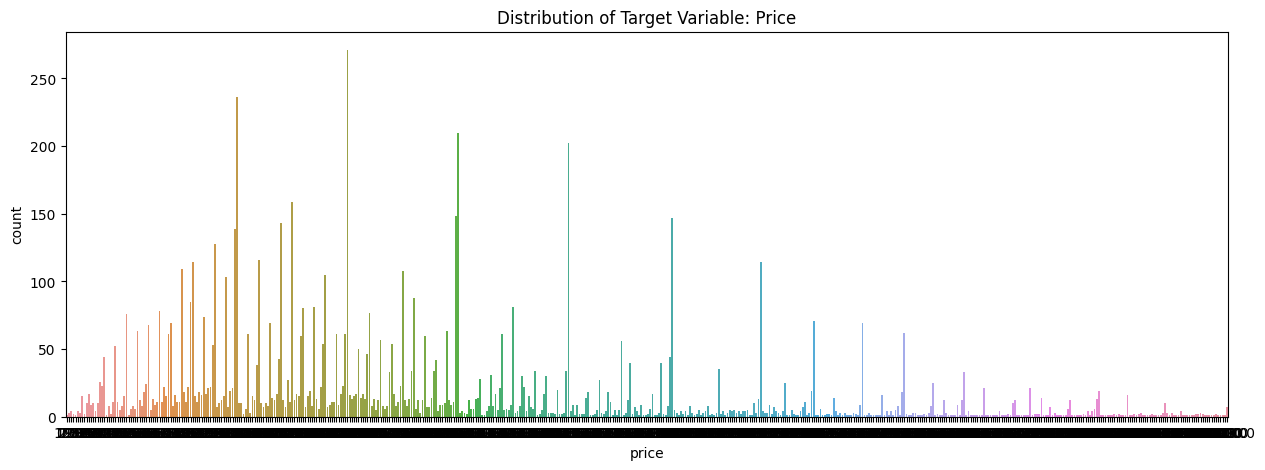

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='price').set(title='Distribution of Target Variable: Price')
plt.show()

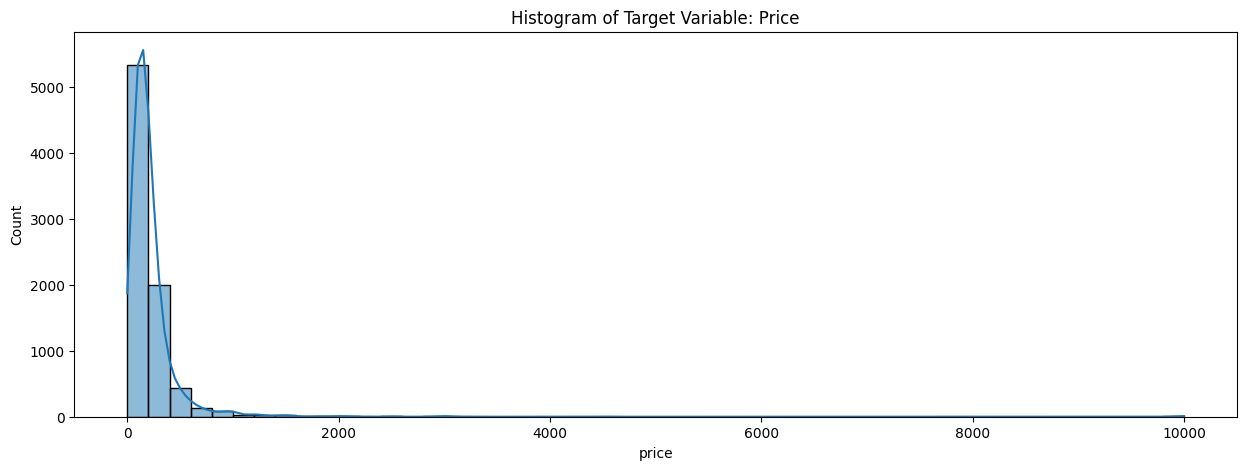

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(df['price'], kde=True, bins=50).set(title='Histogram of Target Variable: Price')
plt.show()

We can clearly see that our target variable Price does not follow a normal distribution, it has a long right tail. However it does have many outliers, as showed in the boxplot below.

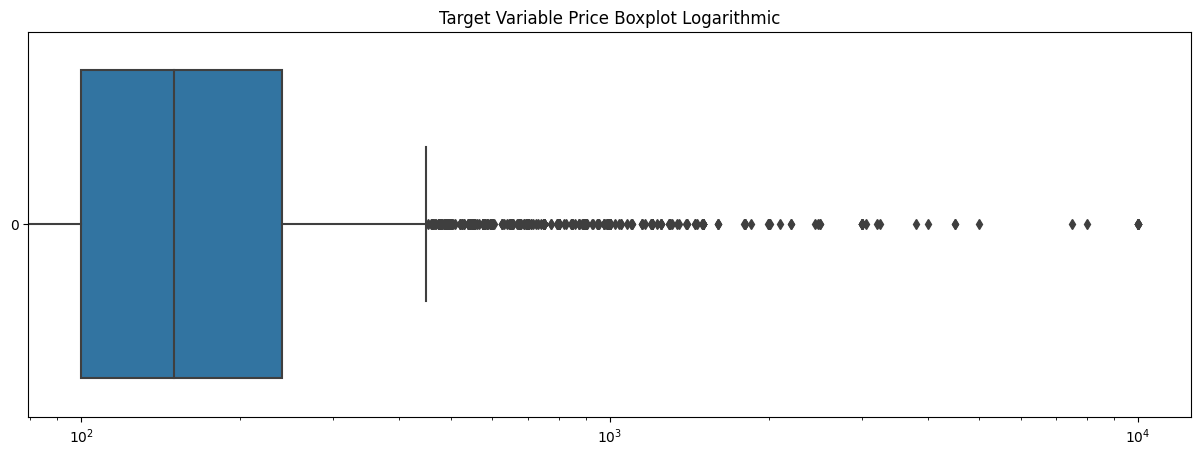

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df['price'], orient='h').set(title='Target Variable Price Boxplot Logarithmic')
ax.set_xscale('log')
plt.show()

We can also sort our data, by descending order of prices. After analyzing it, we have decided to remove the higher outliers, which corresponds to 1.36% of our entire dataset being removed.

In [17]:
df.sort_values('price', ascending=False)

id  latitude  longitude   property_type        room_type  \
7347  36185321  37.79404 -122.42202  Boutique hotel     Private room   
7345  36185102  37.78898 -122.41659  Boutique hotel     Private room   
7346  36185260  37.79240 -122.42060  Boutique hotel     Private room   
7348  36185365  37.79196 -122.42184  Boutique hotel     Private room   
7349  36185403  37.79396 -122.42200  Boutique hotel     Private room   
...        ...       ...        ...             ...              ...   
6098  31312244  37.78592 -122.41036          Hostel       Hotel room   
3148  16570808  37.79996 -122.42461       Apartment     Private room   
3480  18718406  37.76225 -122.42922       Apartment  Entire home/apt   
3751  20331337  37.77249 -122.43543       Apartment     Private room   
3752  20331804  37.74479 -122.41977     Condominium     Private room   

      bathrooms  bedrooms  minimum_nights    price  
7347        1.0       1.0               1  10000.0  
7345        1.0       1.0               1  10000.0  
7346        1.0       1.0               1  10000.0  
7348        1.0       1.0               1  10000.0  
7349        1.0       1.0               1  10000.0  
...         ...       ...             ...      ...  
6098        1.0       1.0              32     19.0  
3148        1.0       1.0              30     10.0  
3480        1.0       0.0              30     10.0  
3751        1.0       1.0               2     10.0  
3752        1.0       1.0               4      0.0  

[8095 rows x 9 columns]

In [18]:
df[df['price'] > 1000].shape[0] / df.shape[0]

0.013588634959851761

In [19]:
df = df[df['price'] <= 1000]

We show again the Distribution and Histogram of our target variable Price, after removal of outliers, which will be used in our studies.

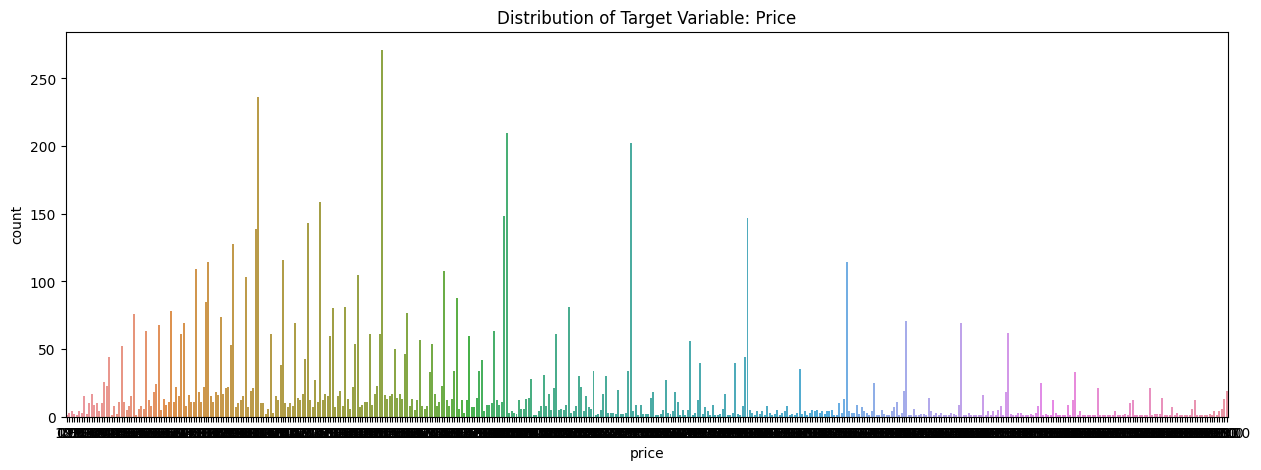

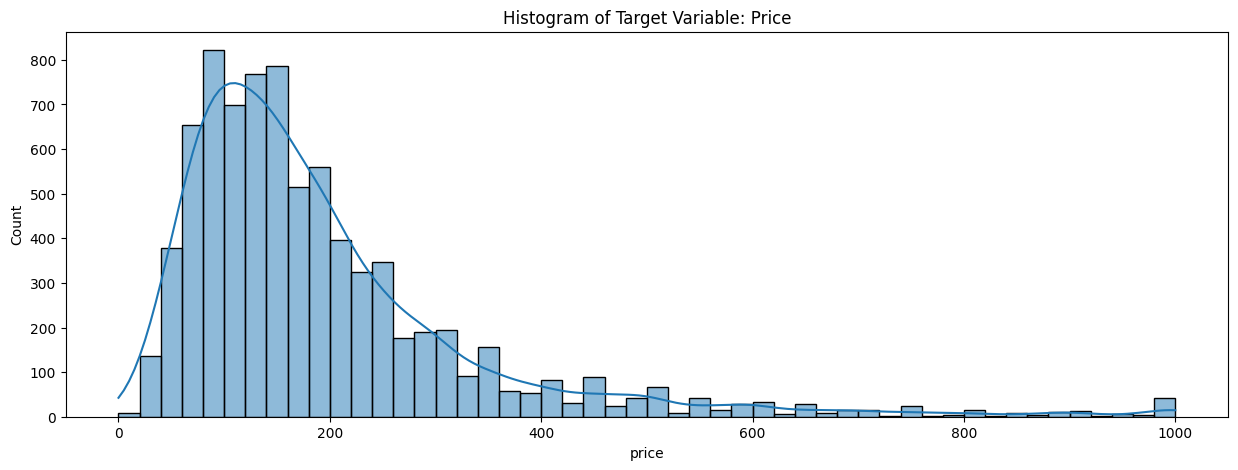

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df, x='price').set(title='Distribution of Target Variable: Price')
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(df['price'], kde=True, bins=50).set(title='Histogram of Target Variable: Price')
plt.show()

Since our target variable Price does not follow a normal distribution, we will perform a power transformation, in order to achieve better modelling in next steps.

Since our data has one row with null price, we will remove this row.<br>
Below we experiment with the Box-Cox and Yeo-Johnson transformations, comparing their p-values, histograms and QQ-plot.

In [21]:
display(df[df['price'] == 0])

df = df[df['price'] != 0]

id  latitude  longitude property_type     room_type  bathrooms  \
3752  20331804  37.74479 -122.41977   Condominium  Private room        1.0   

      bedrooms  minimum_nights  price  
3752       1.0               4    0.0

In [22]:
k2, p = stats.normaltest(df['price'])
print("p-value untransformed: {:g}".format(p))

p-value untransformed: 0


In [23]:
# Box-cox transformation
bc = PowerTransformer(method='box-cox', standardize=False)
y_bc = bc.fit_transform(df[['price']])

k2, p = stats.normaltest(y_bc)
print("p-value Box-Cox: {:g}".format(p[0]))

p-value Box-Cox: 0.0153286


In [24]:
# Yeo-Johnson transformation
yj = PowerTransformer(method='yeo-johnson', standardize=False)
y_yj = yj.fit_transform(df[['price']])

k2, p = stats.normaltest(y_yj)
print("p-value Yeon-Johnson: {:g}".format(p[0]))

p-value Yeon-Johnson: 0.0366085


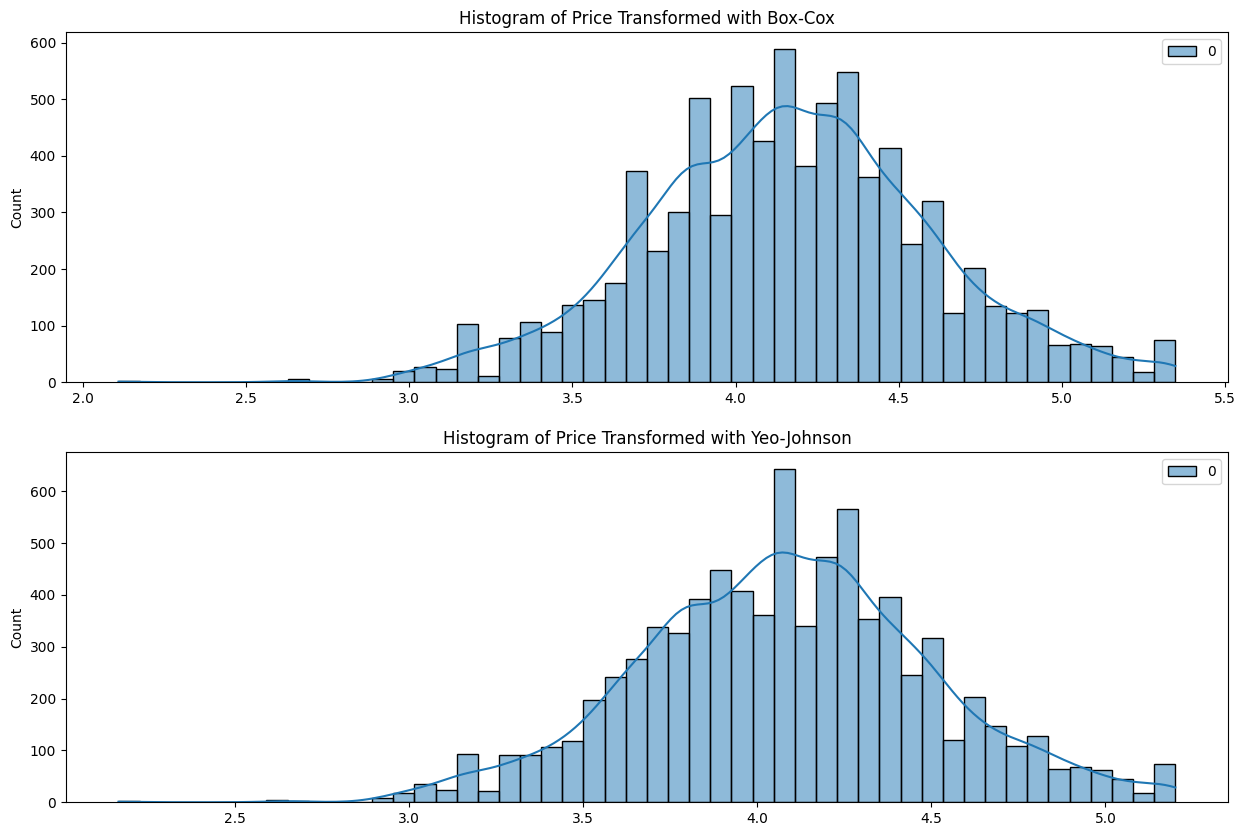

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.histplot(y_bc, kde=True, bins=50, ax=ax[0]).set(title='Histogram of Price Transformed with Box-Cox')
sns.histplot(y_yj, kde=True, bins=50, ax=ax[1]).set(title='Histogram of Price Transformed with Yeo-Johnson')
plt.show()

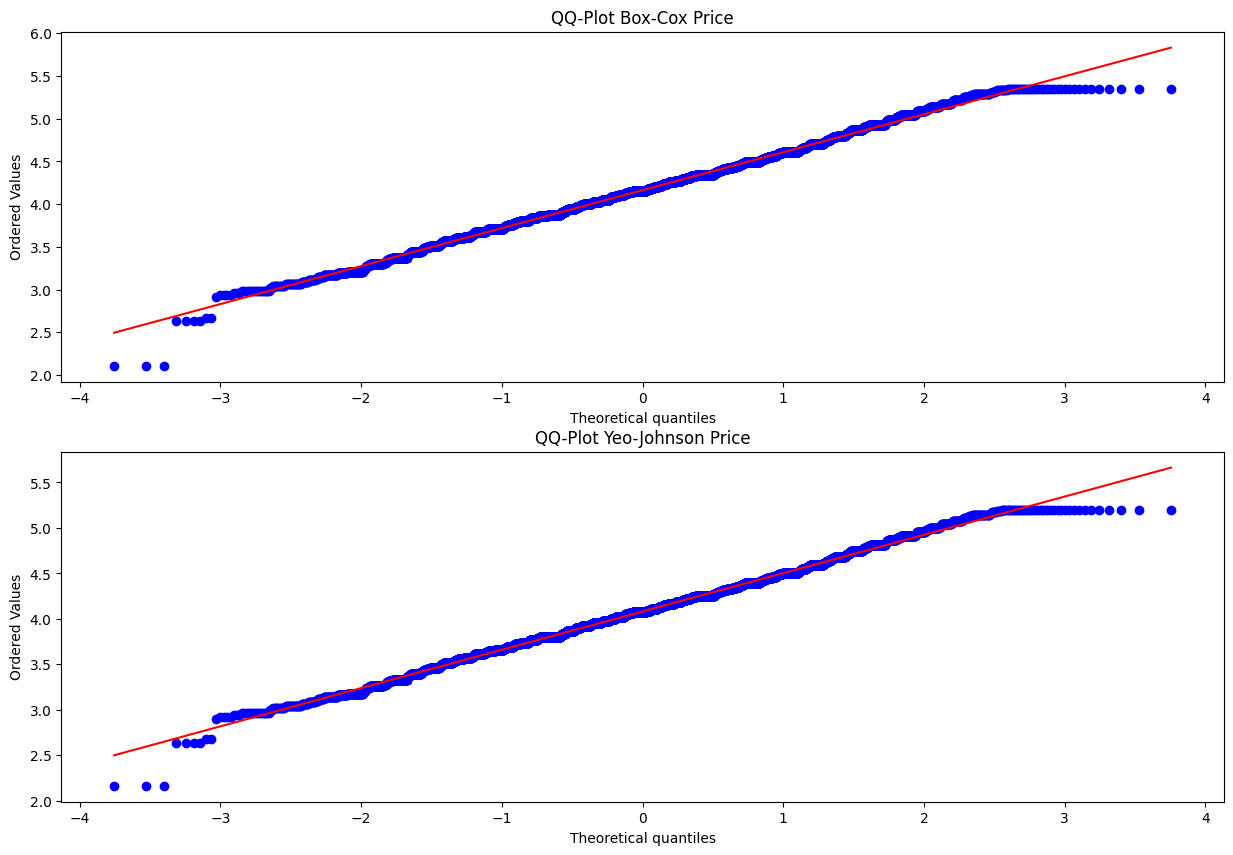

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
stats.probplot(y_bc.reshape((1,-1))[0], dist='norm', plot=ax[0])
stats.probplot(y_yj.reshape((1,-1))[0], dist='norm', plot=ax[1])
ax[0].set_title('QQ-Plot Box-Cox Price')
ax[1].set_title('QQ-Plot Yeo-Johnson Price')
plt.show()

Analyzing the p-values, we see that Box-Cox transformation achieved a value of 0.0153 while the Yeo-Johnson transformation achieved a value of 0.0366. Both values are below 0.05, the p-value we chose, so we can reject the null-hypothesis, and both still do not follow normal distributions.

This is better illustrated by their QQ-Plots, where we can see a flat tail to the right, which corresponds to the high occurrences at the data extremity. Although the transformations did not achieve a complete normal distribution, we will proceed with the Yeo-Johnson transformation.

For the exploratory analysis we will apply the transformation to the entire Price column. Posteriorly for our model training and testing, we will apply the transformation only based on the training set.

In [27]:
original_price = df['price']
df['price'] = y_yj

### 2.2. Numerical variables

We start analyzing the numeric variables of our dataset, showing the correlation matrix between them, foccusing more on our target variable price transformed.

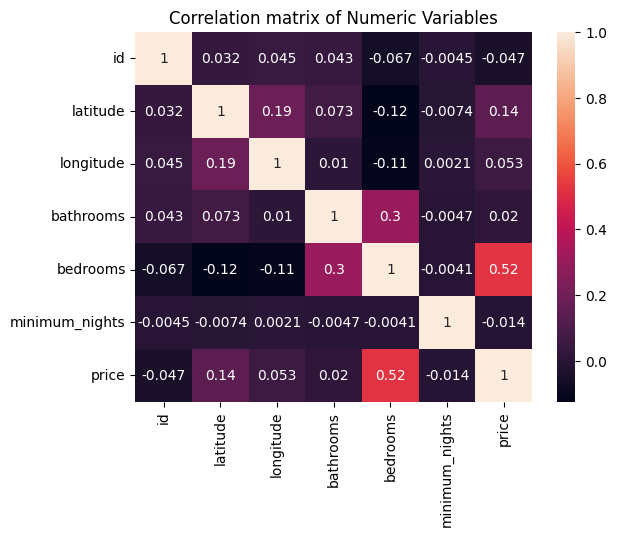

In [28]:
sns.heatmap(df.corr(), annot=True).set(title='Correlation matrix of Numeric Variables')
plt.show()

From the correlation matrix presented above, we can identify there is a moderate linear positive relationship between bedrooms and price. We also identified some weak linear positive relationship between bedrooms to bathrooms. We will proceed with further investigation on each numeric feature.

### 2.3. Columns bedrooms and bathrooms

Since we detected some correlation between these two columns, we will investigate their distribution.<br>
Here we apply countplot instead of histogram, in order to show the PMF (probability mass function).

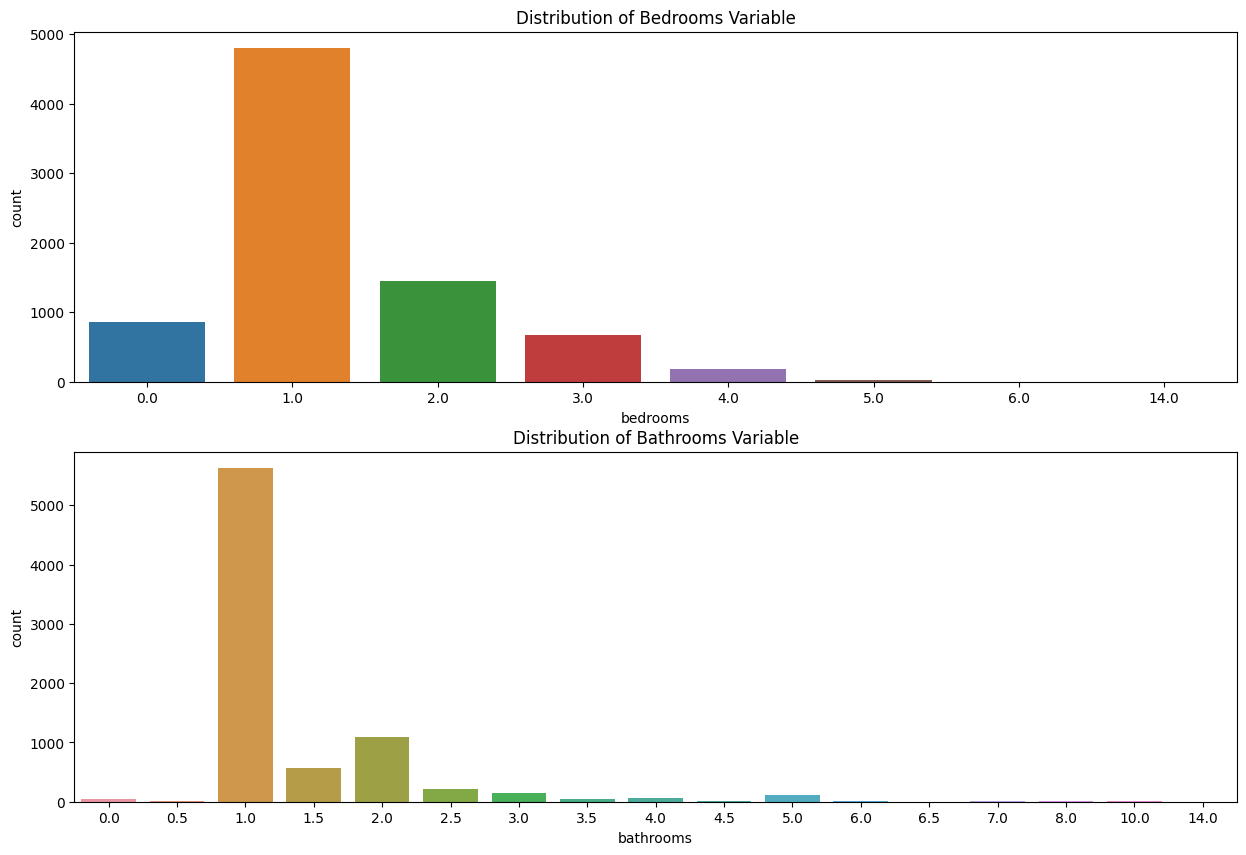

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.countplot(data=df, x='bedrooms', ax=ax[0]).set(title='Distribution of Bedrooms Variable')
sns.countplot(data=df, x='bathrooms', ax=ax[1]).set(title='Distribution of Bathrooms Variable')
plt.show()

Both distributions are skewed with tails to the right.

Next we analyze the relationship of the two columns with the target variable price.

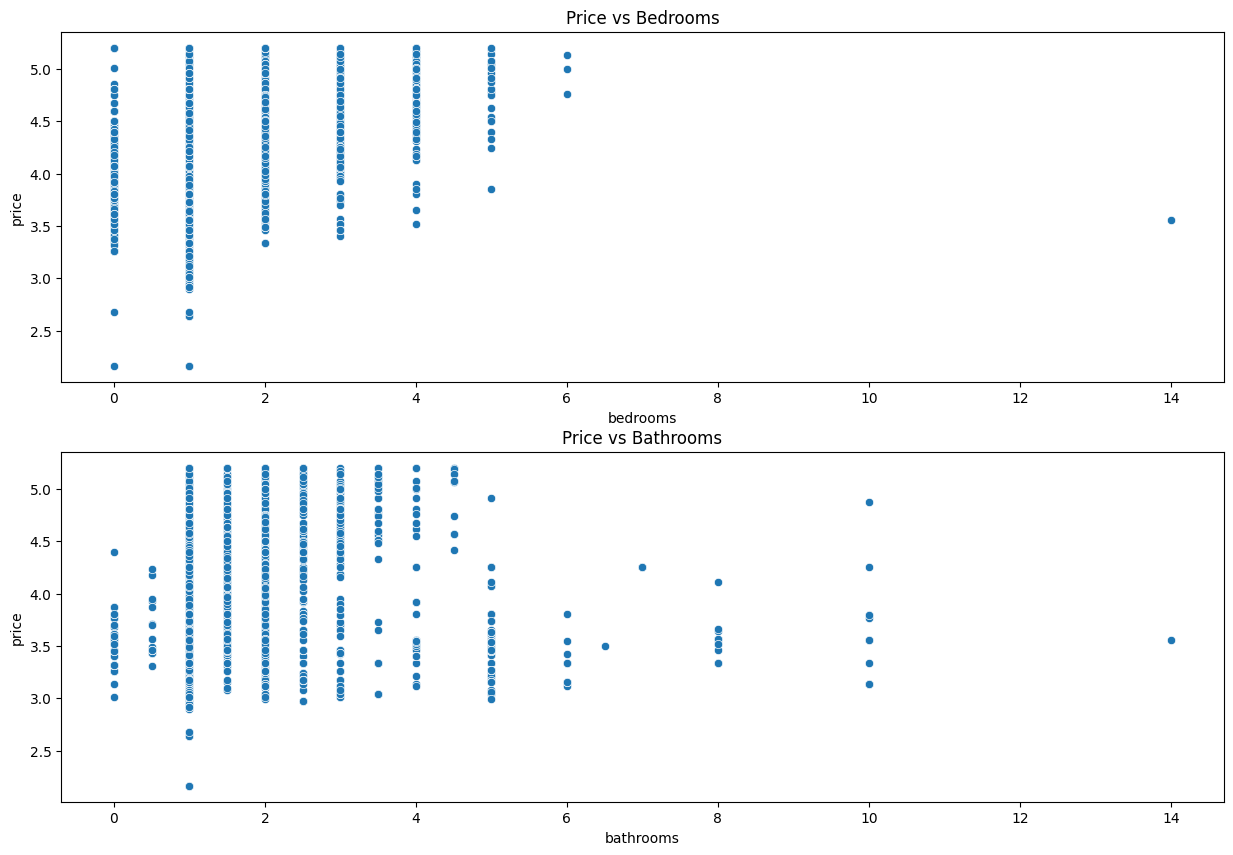

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.scatterplot(data=df, x='bedrooms', y='price', ax=ax[0]).set(title='Price vs Bedrooms')
sns.scatterplot(data=df, x='bathrooms', y='price', ax=ax[1]).set(title='Price vs Bathrooms')
plt.show()

From both scatterplots we can see there is one outlier away from the distributions. We can verify it corresponds to the same row, therefore we will remove it.

For better visualization, we will apply some jitting to the data points. We also included linear regression lines, made by seaborn, just for illustrative purpose.

In [31]:
df.sort_values('bedrooms', ascending=False).head(5)

id  latitude  longitude       property_type        room_type  \
2386  11442093  37.78199 -122.42170      Boutique hotel     Private room   
2210  10369097  37.77246 -122.44413               House  Entire home/apt   
4262  22508553  37.75922 -122.44191  Serviced apartment  Entire home/apt   
2758  14453697  37.70837 -122.46033           Townhouse  Entire home/apt   
999    2539953  37.74256 -122.43406               House  Entire home/apt   

      bathrooms  bedrooms  minimum_nights     price  
2386       14.0      14.0               7  3.555265  
2210        3.5       6.0               1  5.135170  
4262        4.0       6.0              90  4.759620  
2758        4.0       6.0               2  4.992776  
999         2.0       5.0               2  4.959639

In [32]:
df.sort_values('bathrooms', ascending=False).head(5)

id  latitude  longitude      property_type     room_type  \
2386  11442093  37.78199 -122.42170     Boutique hotel  Private room   
1775   7343277  37.79909 -122.40631             Hostel   Shared room   
2472  12270642  37.79925 -122.40460  Bed and breakfast   Shared room   
2365  11297447  37.79849 -122.40407  Bed and breakfast   Shared room   
1361   4670847  37.79892 -122.40408  Bed and breakfast   Shared room   

      bathrooms  bedrooms  minimum_nights     price  
2386       14.0      14.0               7  3.555265  
1775       10.0       1.0               1  3.139803  
2472       10.0       1.0               1  3.555265  
2365       10.0       1.0               1  3.555265  
1361       10.0       1.0               1  3.139803

In [33]:
df = df.drop(df[(df['bedrooms'] == 14) & (df['bathrooms'] == 14)].index)

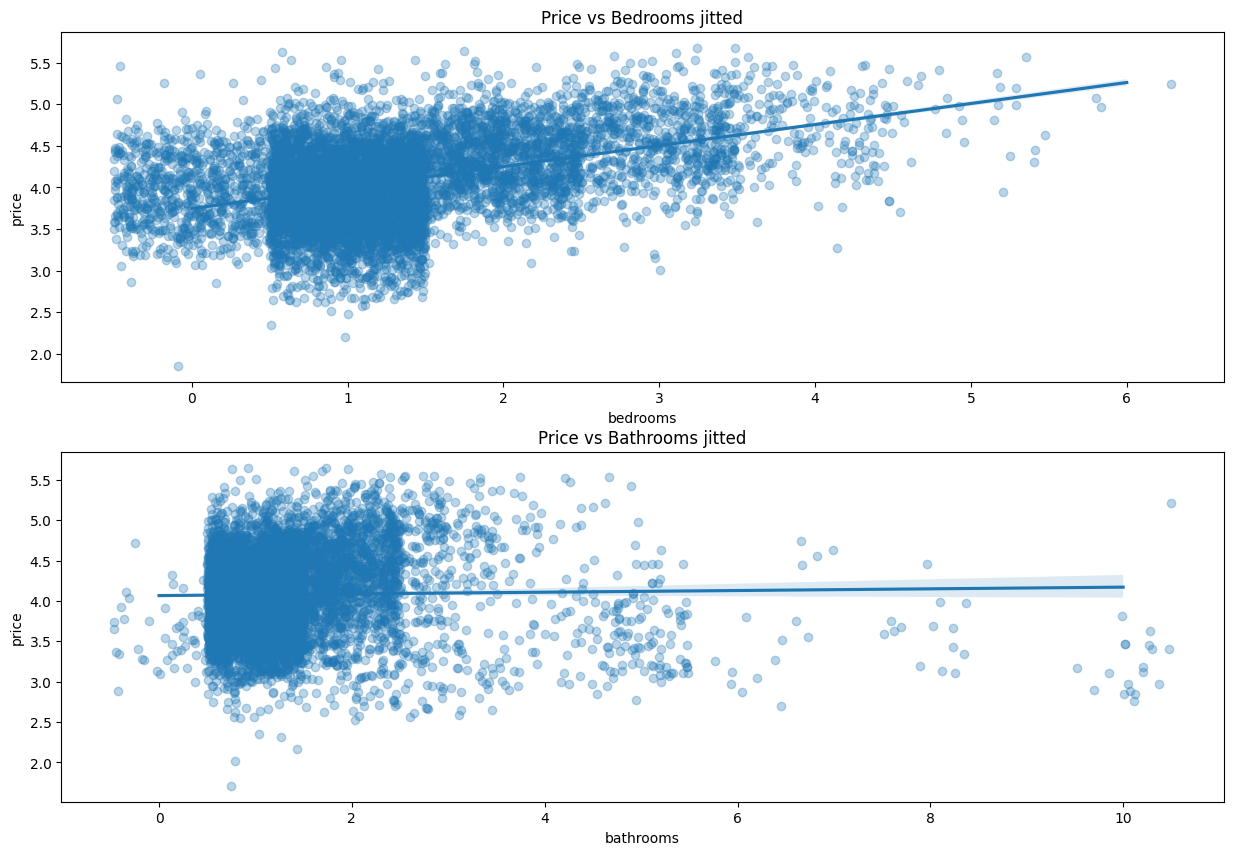

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.regplot(data=df, x='bedrooms', y='price', ax=ax[0], x_jitter=0.5, y_jitter=0.5, scatter_kws={'alpha':0.3}).set(title='Price vs Bedrooms jitted')
sns.regplot(data=df, x='bathrooms', y='price', ax=ax[1], x_jitter=0.5, y_jitter=0.5, scatter_kws={'alpha':0.3}).set(title='Price vs Bathrooms jitted')
plt.show()

### 2.4. Column id

This feature does not add any information to our model. We can check that each row has a different id.<br>
So we will not select it as feature for prediction.

In [35]:
print('Number of unique ids: ', len(df['id'].unique()))
print('Rows of df: ', df.shape[0])

Number of unique ids:  7983
Rows of df:  7983


### 2.5. Columns latitude and longitude

For exploratory analysis, we will look the latitude and longitude distributions.

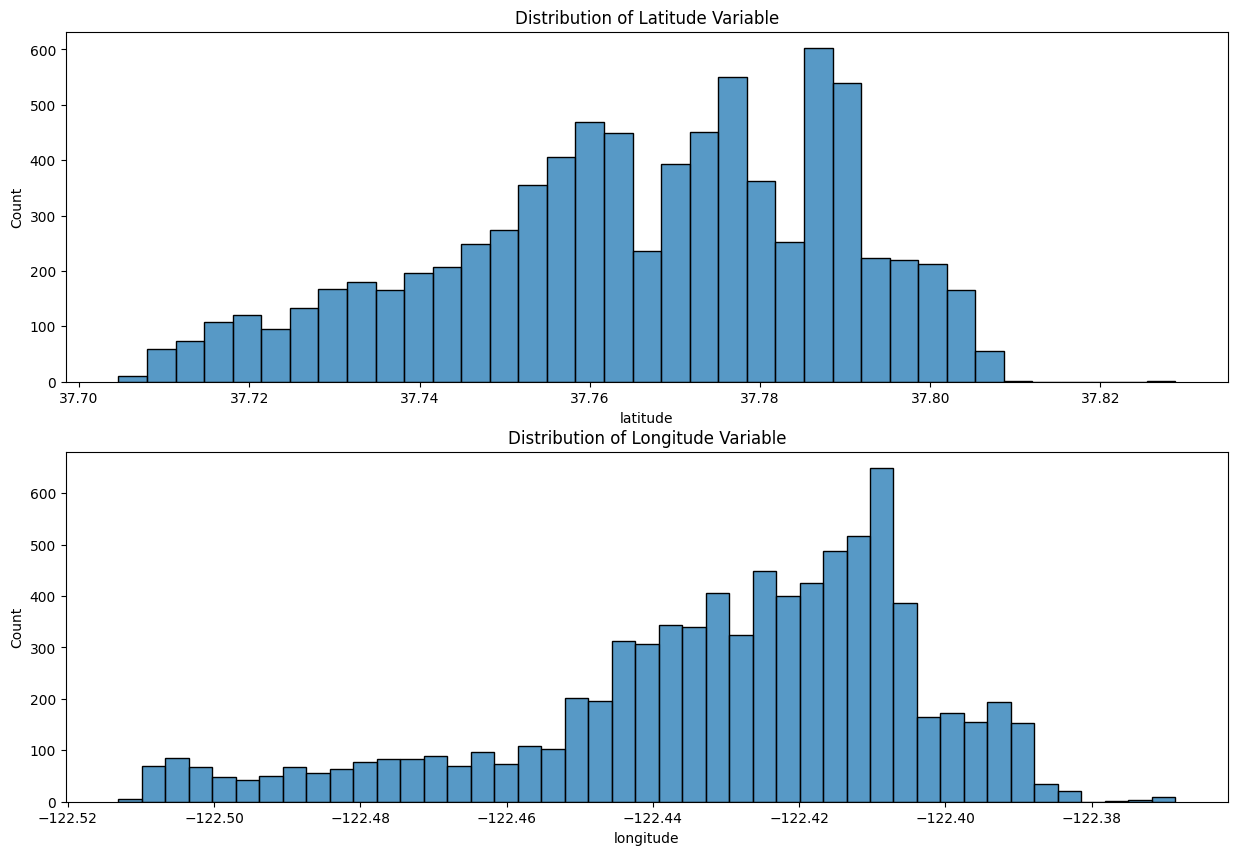

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.histplot(df['latitude'], ax=ax[0]).set(title='Distribution of Latitude Variable')
sns.histplot(df['longitude'], ax=ax[1]).set(title='Distribution of Longitude Variable')
plt.show()

Both distributions are slightly skewed with tails to the left. We will investigate their relationship to the target variable price.

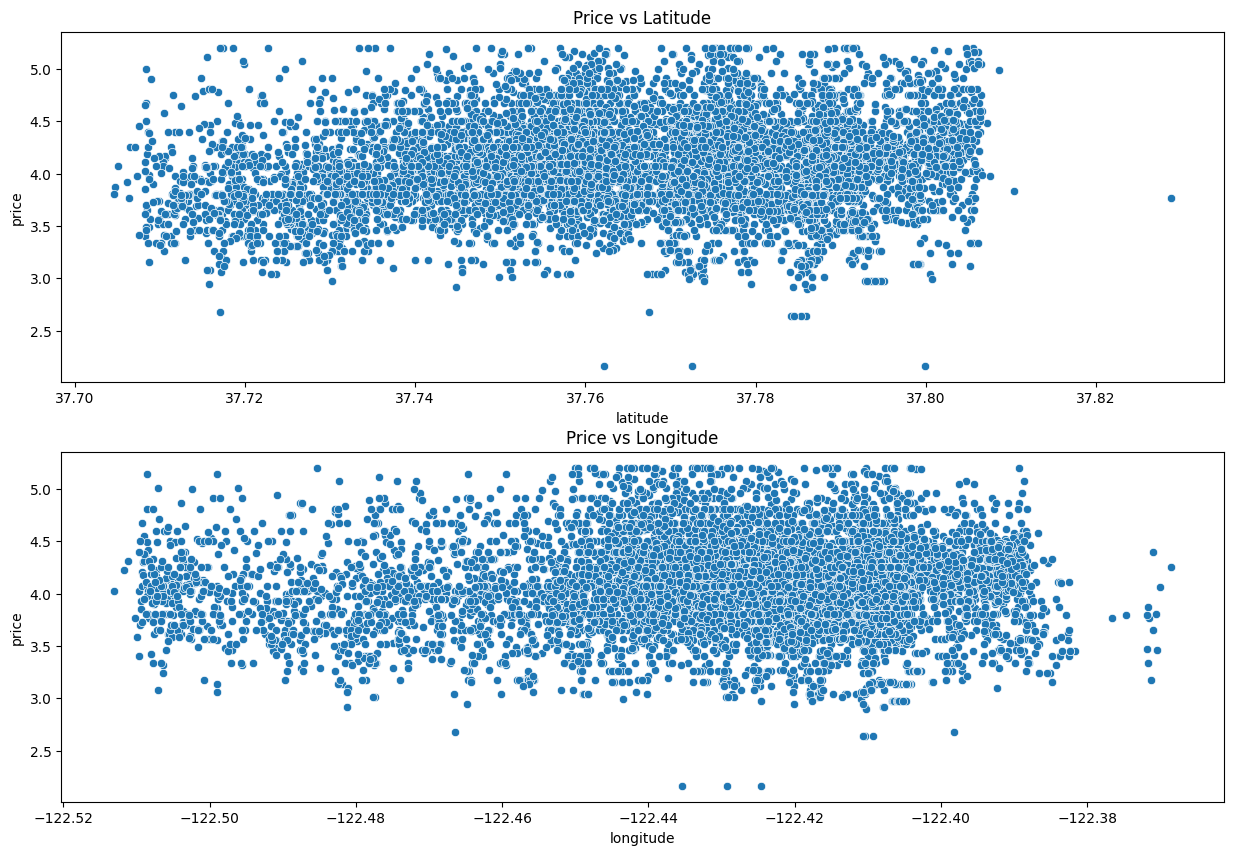

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))
sns.scatterplot(data=df, x='latitude', y='price', ax=ax[0]).set(title='Price vs Latitude')
sns.scatterplot(data=df, x='longitude', y='price', ax=ax[1]).set(title='Price vs Longitude')
plt.show()

From the scatterplots we can see there is no relationship between price and latitude/longitude.

### 2.6. Column minimum_nights

We start analyzing this column by showing its distribution through a boxplot. We can see there are some outliers.

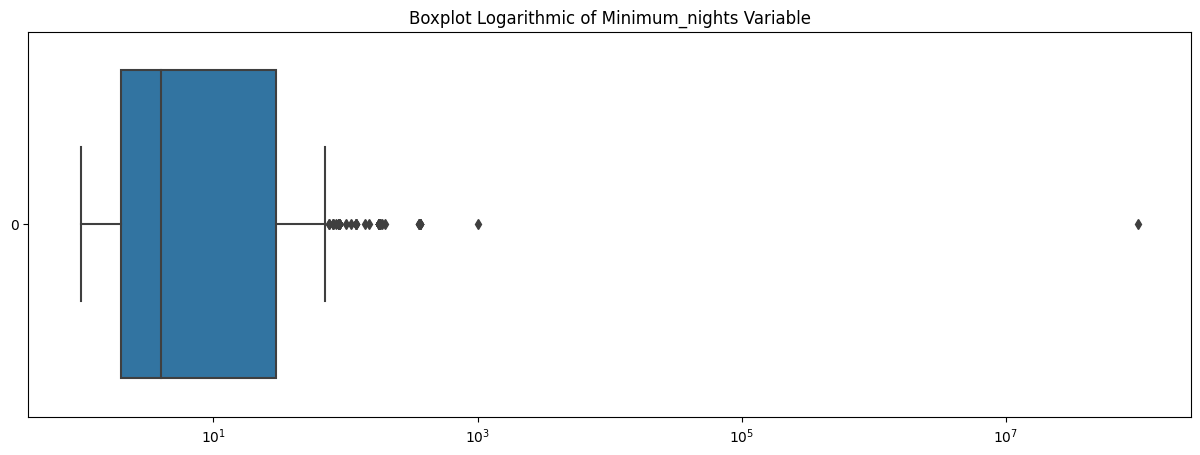

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df['minimum_nights'], orient='h').set(title='Boxplot Logarithmic of Minimum_nights Variable')
ax.set_xscale('log')
plt.show()

Sorting the dataframe by minimum_nights column, in descending order, we can verify the outliers. They are not reasonable, so we will remove the first two rows.

In [39]:
df.sort_values('minimum_nights', ascending=False)

id  latitude  longitude property_type        room_type  bathrooms  \
2912  15344978  37.75071 -122.42521     Apartment     Private room        1.0   
3664  19813606  37.79305 -122.42482   Condominium  Entire home/apt        1.0   
4967  25785670  37.78862 -122.38892   Condominium  Entire home/apt        1.0   
2479  12361066  37.78538 -122.38997     Apartment  Entire home/apt        2.0   
2018   8818098  37.78818 -122.39181     Apartment  Entire home/apt        2.0   
...        ...       ...        ...           ...              ...        ...   
4859  25058405  37.71718 -122.40207         House     Private room        1.0   
4860  25058782  37.71678 -122.40350         House  Entire home/apt        1.0   
4861  25058920  37.71644 -122.40312         House     Private room        1.0   
4864  25106995  37.75228 -122.39277     Apartment  Entire home/apt        2.0   
8110  39354181  37.70707 -122.44812         House     Private room        1.0   

      bedrooms  minimum_nights     price  
2912       1.0       100000000  3.545295  
3664       1.0            1000  4.070298  
4967       0.0             365  3.930845  
2479       2.0             365  4.259595  
2018       1.0             365  4.111729  
...        ...             ...       ...  
4859       1.0               1  4.186793  
4860       2.0               1  4.504166  
4861       1.0               1  4.070298  
4864       2.0               1  4.364572  
8110       2.0               1  4.253340  

[7983 rows x 9 columns]

In [40]:
df = df[df['minimum_nights'] <= 365]

After removing these rows, we can show the boxplot again.

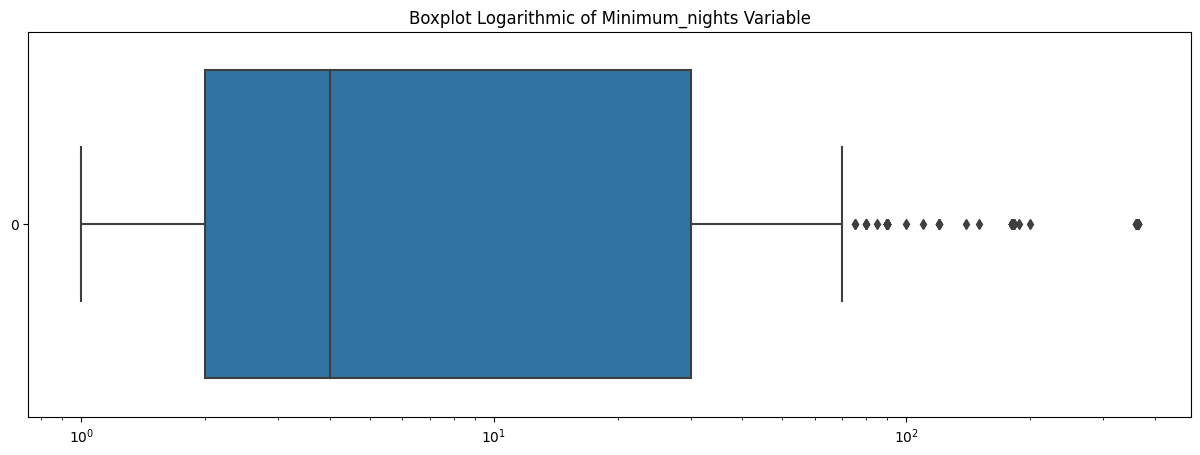

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df['minimum_nights'], orient='h').set(title='Boxplot Logarithmic of Minimum_nights Variable')
ax.set_xscale('log')
plt.show()

There are still outliers, but we will keep them, since they may represent real intended values.<br>
We may proceed now by analyzing the distribution of minimum_nights with histogram.

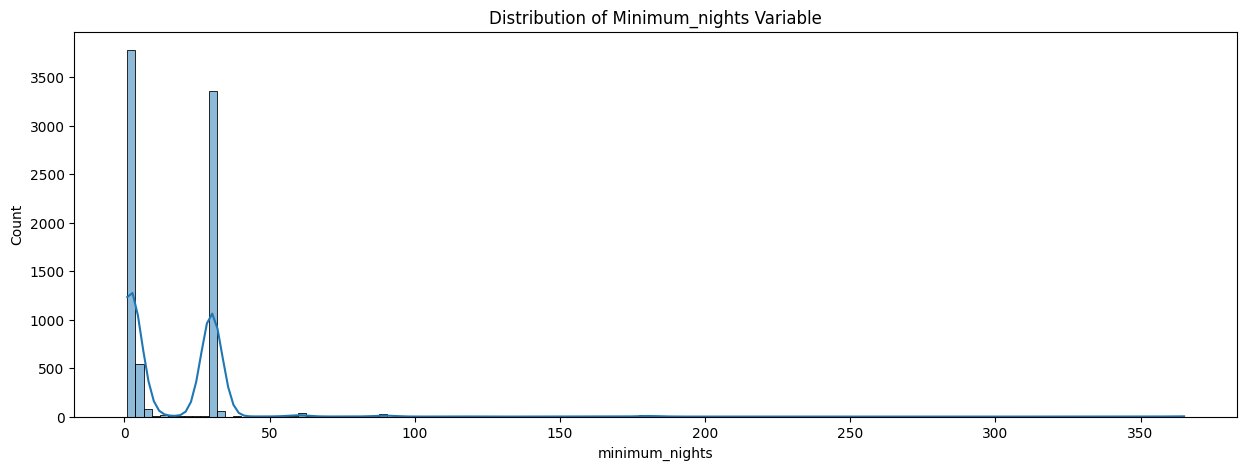

In [42]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(df['minimum_nights'], kde=True).set(title='Distribution of Minimum_nights Variable')
plt.show()

This feature distribution reveals something interesting. It follows a bimodal distribution, with one peak close to 1-2 minimum nights and another peak related to 30 minimum nights.

Let us visualize now how it relates to our target variable price.

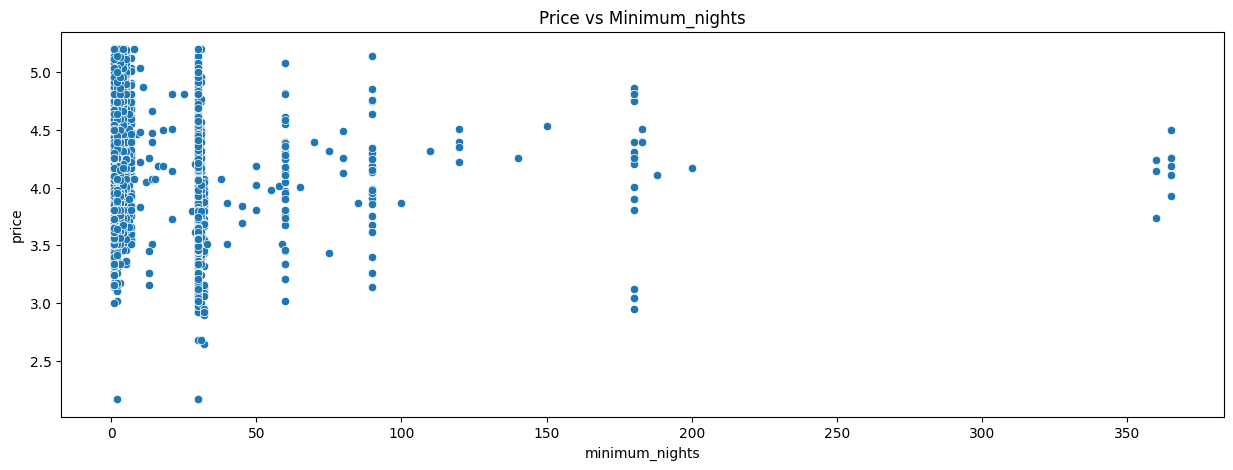

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df, x='minimum_nights', y='price').set(title='Price vs Minimum_nights')
plt.show()

We will apply a little jitting again, together with a linear regression line, made by seaborn, for illutrative purpose.

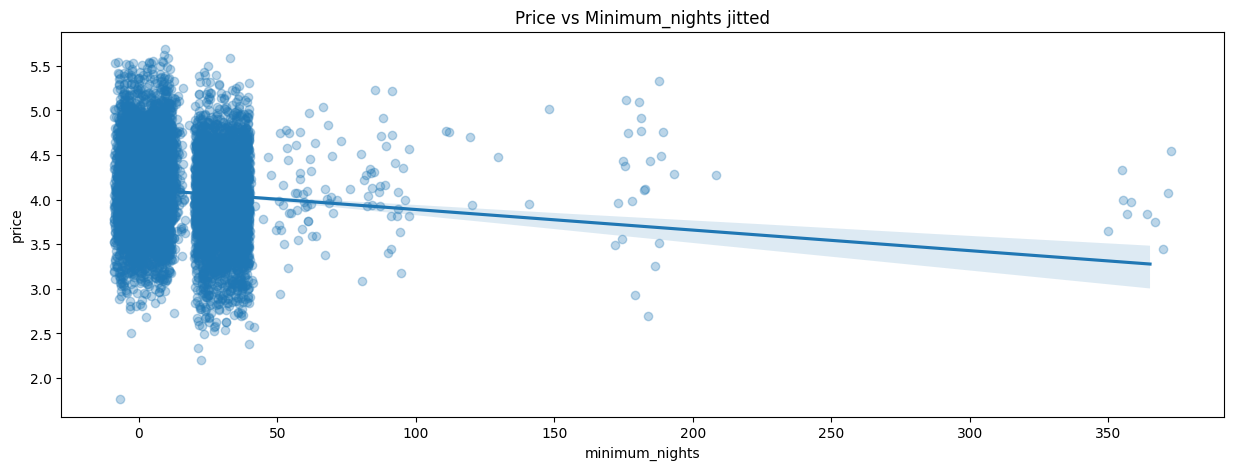

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
sns.regplot(data=df, x='minimum_nights', y='price', x_jitter=10, y_jitter=0.5, scatter_kws={'alpha':0.3}, order=1).set(title='Price vs Minimum_nights jitted')
plt.show()

### 2.7. Categorical variables

We now proceed to investigate the categorical variables.

### 2.8. Column property_type

We will perform first a more detailed investigation on property_type column, since it may have categories with similar meaning, among all 26 different values.

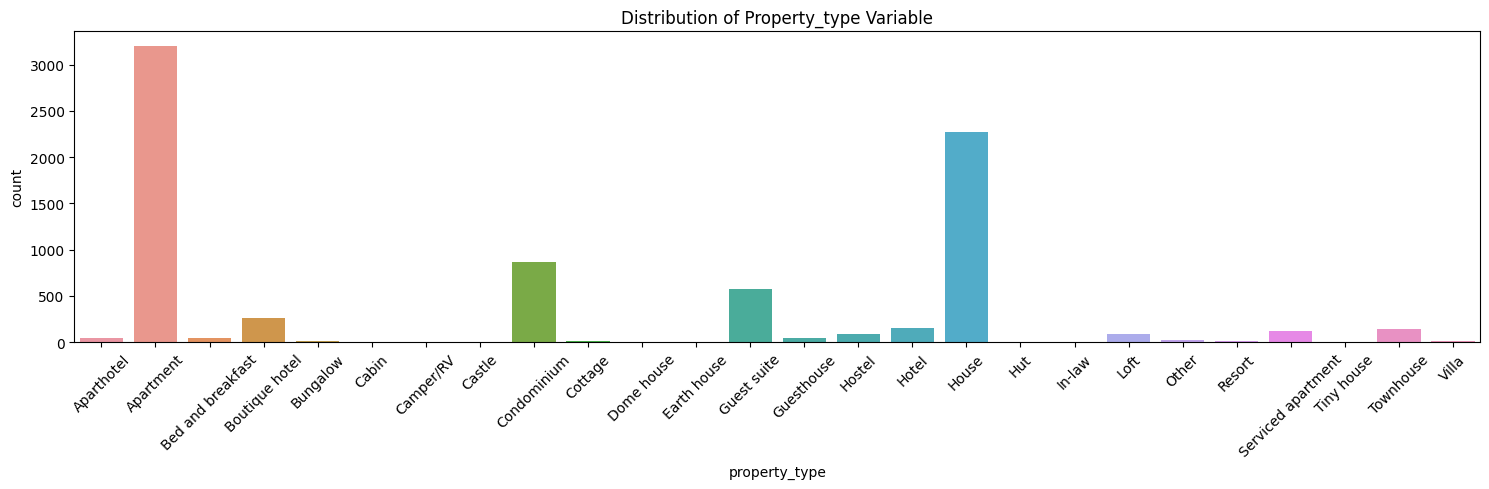

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='property_type').set(title='Distribution of Property_type Variable')
ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

Visualizing property_type distribution, we can see that there is a significant quantity of diffenrent categories. But just a few of them show significant instances. Let us investigate those who appear less.

In [46]:
df.value_counts('property_type', ascending=True)

property_type
Camper/RV                1
In-law                   1
Dome house               1
Hut                      1
Earth house              2
Tiny house               3
Cabin                    3
Castle                   4
Villa                    9
Cottage                 12
Resort                  14
Bungalow                17
Other                   24
Aparthotel              40
Guesthouse              41
Bed and breakfast       43
Hostel                  86
Loft                    88
Serviced apartment     118
Townhouse              140
Hotel                  154
Boutique hotel         257
Guest suite            576
Condominium            871
House                 2275
Apartment             3200
dtype: int64

Visualizing how the variable property_type relates to our target variable price and analyzing its categories we can see that there are different categories with similar meaning and behavior like the words 'Aparthotel', 'Apartment' and 'Condominium'.

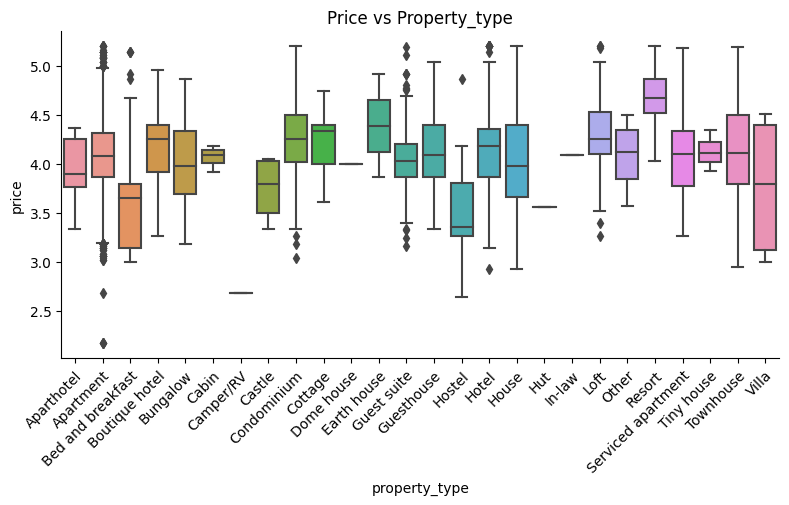

In [47]:
sns.catplot(data=df, x='property_type', y='price', kind='box', height=4, aspect=2).set(title='Price vs Property_type')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Since we have so many different categories with so few instances and different words representing the same category, we will proceed by mapping categories with similar meaning, into 9 different categories: apartment, castle, guest, hostel, hotel, house, others, resort and tiny house, as presented by the following table:

|Group|Original|
|--|--|
|Apartment|Aparthotel|
|Apartment|Apartment|
|Apartment|Condominium|
|Apartment|Serviced apartment|
|Apartment|Townhouse|
|Castle|Castle|
|Guest|Guest suite|
|Guest|Guesthouse|
|Hostel|Bed and breakfast|
|Hostel|Hostel|
|Hotel|Boutique hotel|
|Hotel|Hotel|
|House|House|
|House|Bungalow|
|House|Cottage|
|House|Loft|
|Others|Other|
|Others|Villa|
|Resort|Resort|
|Tiny House|Cabin|
|Tiny House|Tiny house|

In [48]:
mapping = {'Aparthotel':'Apartment',
           'Apartment':'Apartment',
           'Bed and breakfast':'Hostel',
           'Boutique hotel':'Hotel',
           'Bungalow':'House',
           'Cabin':'Tiny House',
           'Castle':'Castle',
           'Condominium':'Apartment',
           'Cottage':'House',
           'Guest suite':'Guest',
           'Guesthouse':'Guest',
           'Hostel':'Hostel',
           'Hotel':'Hotel',
           'House':'House',
           'Loft':'House',
           'Other':'Others',
           'Resort':'Resort',
           'Serviced apartment':'Apartment',
           'Tiny house':'Tiny House',
           'Townhouse':'Apartment',
           'Villa':'Others',
           'Camper/RV':'Others',
           'Dome house':'Others',
           'Earth house':'Others',
           'Hut':'Others',
           'In-law':'Others'}
df['property_type'] = df['property_type'].replace(mapping)

In [49]:
df['property_type'].cat.remove_unused_categories(inplace=True)

We can now investigate once more the distribution and also the variable property_type relationship to the target variable price.

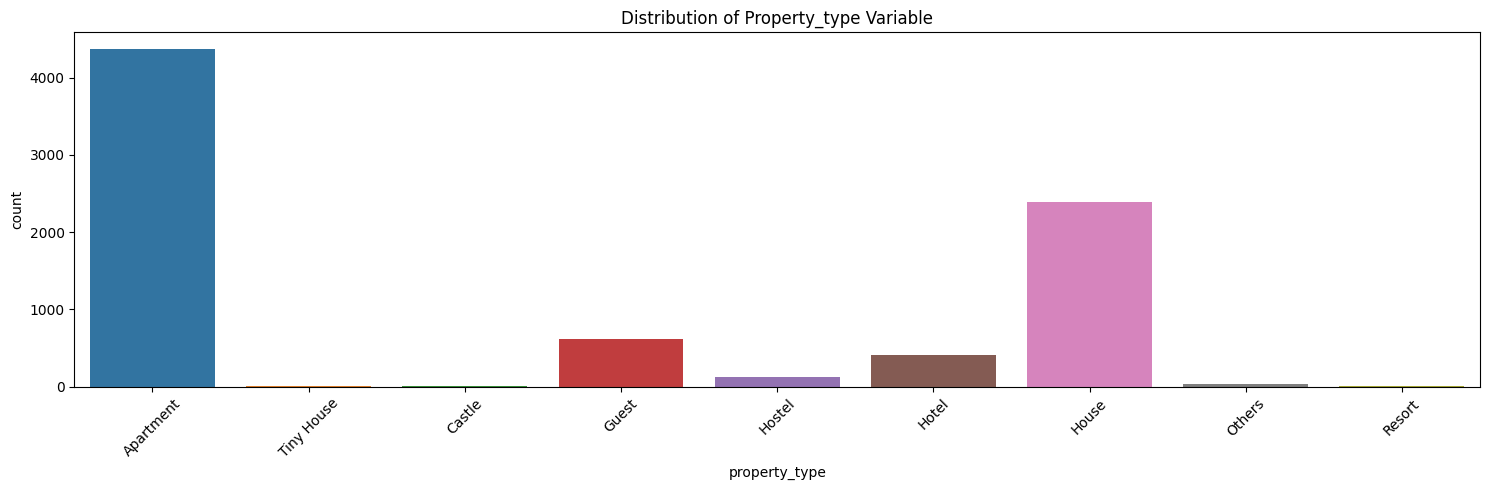

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='property_type').set(title='Distribution of Property_type Variable')
ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.show()

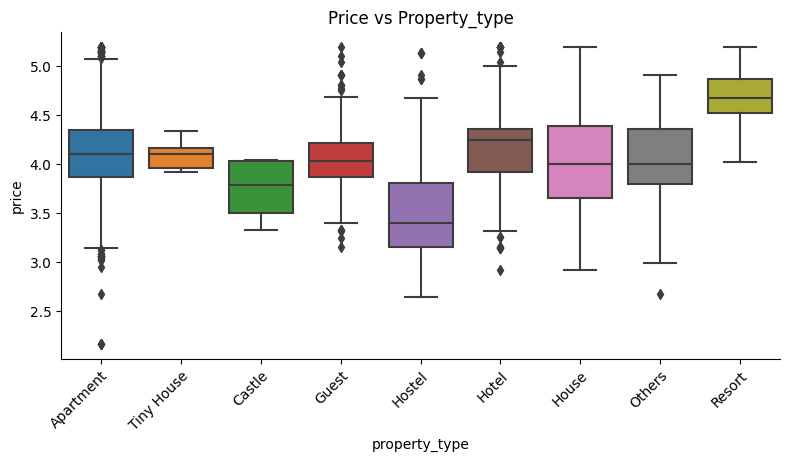

In [51]:
sns.catplot(data=df, x='property_type', y='price', kind='box', height=4, aspect=2).set(title='Price vs Property_type')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

The mapping of 26 different categories into 9 categories might help us model better the problem.

### 2.9. Column room_type

We start analyzing the distribution of room_type column.

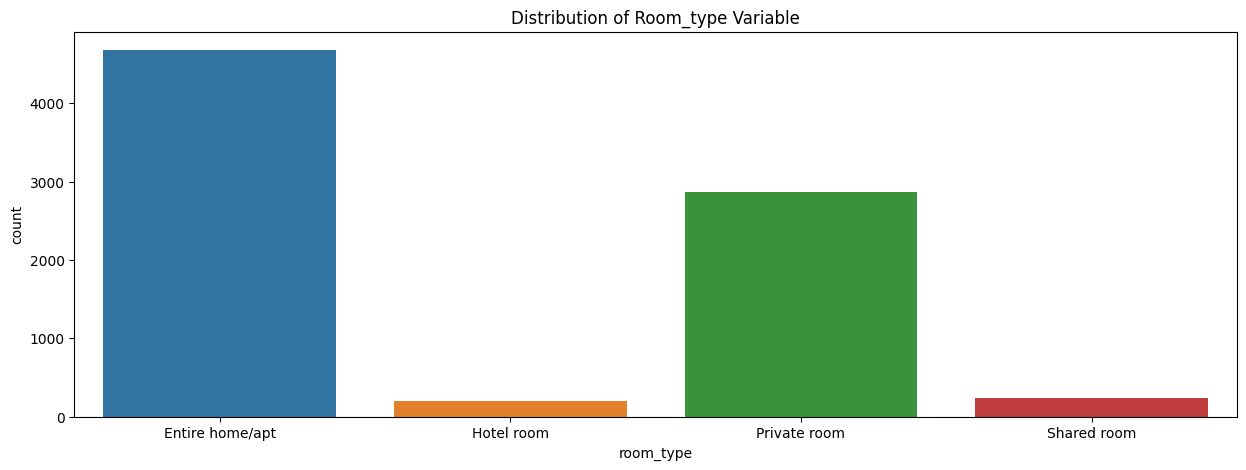

In [52]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x='room_type').set(title='Distribution of Room_type Variable')
plt.show()

Analyzing the countplots above, we can see that it has unbalanced distribution.<br>
Let's analyze how this variable relates to our target variable price.

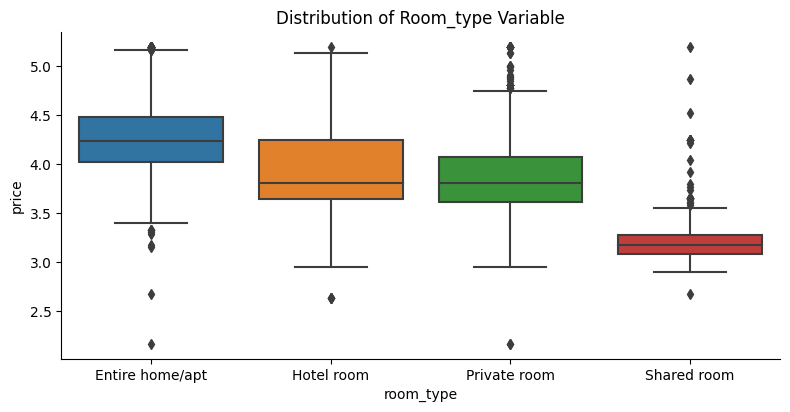

In [53]:
sns.catplot(data=df, x='room_type', y='price', kind='box', height=4, aspect=2).set(title='Distribution of Room_type Variable')
plt.show()

From the boxplot presented, we can see there is some slighty difference in distribution of prices among room_type categories, however all of them have outliers.

### 2.10. Exploratory Analysis Conclusion

Overall, the data appears to be very scrambled and difficult to model. The variable bedrooms showed as the best numerical variable, with a slight clearer linear correlation with price. Among the categorical variables, room_type presented the best distribution of different prices among its categories.

The columns minimum_nights and bathrooms, despite being numerical, had price values along almost the entire range, for same feature values. This might compromise considerably the models development in next step.

## 3. Model Development

In this step we will identify the proper type of problem, implement two machine learning models, one for baseline and one for comparison, and fit both.

Our target variable is price and it is a numerical variable, therefore we have a regression problem.

### 3.1. Baseline Model

For our baseline model we will select a Linear Regression model, since it is one of the simplest models and some of our variables have moderate relationship to the target variable.

First we need to select the proper variables, which will be used as features for our models. From our exploratory analysis, we will select the columns property_type, room_type, bedrooms, bathrooms and minimum_nights.

In [54]:
features = ['property_type', 'room_type', 'bedrooms', 'bathrooms', 'minimum_nights']
numeric = ['bedrooms', 'bathrooms', 'minimum_nights']

X = df[features]
y = original_price[df.index]

We also need to do some proper transformations first. The categorical variables will be transformed to numeric features. Since we wanto to give equal weightage to the categorical variables, we will apply one hot encoder transformation.

In [55]:
X = pd.get_dummies(X, drop_first=True)

We will now split the data into training and test sets.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Now we will apply power transformation on the target variable price and standardization to the numerical features. We fit and transform on the training set and transform the test set.

In [57]:
# Power transformation to the target variable price
transformer = PowerTransformer(method='yeo-johnson')
y_train = pd.Series(transformer.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0],
                    index=y_train.index)
y_test = pd.Series(transformer.transform(y_test.values.reshape(-1,1)).reshape(1,-1)[0],
                   index=y_test.index)

# Standardization of numerical features
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

We are now ready to fit our baseline model.

In [58]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### 3.2. Comparison Model

For our comparison model we chose to apply an Ensemble Model, by applying a Bagging Regressor with multiple Decision Tree Regressors.

We chose to use Decision Trees in order to model the non-linearities of the model. In addition, we employed Ensemble Model for a more robust and less overfitted regressor.

In [59]:
# Ensemble Bagging
# Bootstrapping Aggregation (different subsets of training set)
tree = DecisionTreeRegressor(max_depth=8,min_samples_split=2,random_state=42)
br = BaggingRegressor(base_estimator=tree, n_estimators=300, n_jobs=-1)
br.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                      random_state=42),
                 n_estimators=300, n_jobs=-1)

## 4. Model Evaluation

In this step we will evaluate both models performance, in the test set. We will compare both based on two regression metrics: the R-Squared Score, which measures how well the model fits dependent variables and the RMSE (Root Mean Squared Error), which measures how much the predicted results deviate from the real target values.

### 4.1. Linear Regressor

We start analyzing how our baseline model performs on the test set.

In [60]:
y_pred_lr = lr.predict(X_test)
print('Linear Regression r2_score: ', r2_score(y_test,y_pred_lr))
print('Linear Regression Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_lr)))

Linear Regression r2_score:  0.5280860127679532
Linear Regression Root Mean Squared Error:  0.663809128202238


### 4.2. Bagging Regressor

We now compare our comparison model on the same test set.

In [61]:
y_pred_br = br.predict(X_test)
print('Bagging Regressor r2_score: ', r2_score(y_test,y_pred_br))
print('Bagging Regressor Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_br)))

Bagging Regressor r2_score:  0.5920528067675546
Bagging Regressor Root Mean Squared Error:  0.6171827369754875


### 4.3. Hyperparameters tunning

We would like to perform a Grid Search Cross Validation, in order to find the best hyperparameters for our Decision Tree Regressor and Bagging Regressor.

We will foccus on the following hyperparameters:

- Decision Tree Regressor: max_depth
- Decision Tree Regressor: min_samples_split
- Bagging Regressor: n_estimators

This test should take around 3 min to run with standard environment configurations.

In [62]:
from sklearn.model_selection import GridSearchCV

params_br = {
    'base_estimator__max_depth': [3, 5, 7, 9, 11],
    'base_estimator__min_samples_split': [2, 3],
    'n_estimators': [300, 400, 500]
}

tree = DecisionTreeRegressor(random_state=42)
br = BaggingRegressor(base_estimator=tree)

grid_br = GridSearchCV(estimator=br,
                       param_grid=params_br,
                       scoring='r2',
                       cv=5)
grid_br.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42)),
             param_grid={'base_estimator__max_depth': [3, 5, 7, 9, 11],
                         'base_estimator__min_samples_split': [2, 3],
                         'n_estimators': [300, 400, 500]},
             scoring='r2')

In [63]:
best_hyperparams = grid_br.best_params_
best_CV_score = grid_br.best_score_

print(f'Best hyperparams: {best_hyperparams}')
print(f'Best score: {best_CV_score}')

Best hyperparams: {'base_estimator__max_depth': 9, 'base_estimator__min_samples_split': 3, 'n_estimators': 300}
Best score: 0.6184974546432089


In [64]:
best_br = grid_br.best_estimator_
y_pred_best_br = best_br.predict(X_test)
print('Best Bagging Regressor r2_score: ', r2_score(y_test,y_pred_best_br))
print('Best Bagging Regressor Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,y_pred_best_br)))

Best Bagging Regressor r2_score:  0.5930933608117654
Best Bagging Regressor Root Mean Squared Error:  0.61639510802433


By comparing the first bagging regressor model with the best one achieved, through the Grid Search CV, there is only a slight improvement in the model metrics.

### 4.4. Model Evaluation Conclusions

By comparing both models R-Squared Score and RMSE, we verify that the Bagging Regressor has a better performance than the Linear Regressor. This indicates that the problem may have influence of non-linearities.

However both R-Squared Scores were still very far from the ideal 1.0. This illustrates how the data is scrambled and presents challenges for the models to predict correctly.

With these results, we will proceed to the Business Criteria and show how this models can still benefit the company, although their low performances.

## 5. Business Criteria

The company wants to avoid estimating prices that are more than 25 dollars off of the actual price. Therefore, we will show the percentage of predictions with price within range of 25 dollars from the actual price, as KPI to compare the two models.

For our calculations we will transform back the predictions made on previous step, to dollar uni.

In [65]:
# Yeo-Johnson inverse tranformation, back to dollars
price_df = pd.DataFrame(y_test, columns=['price'])
price_df['price'] = transformer.inverse_transform(y_test.values.reshape(-1,1))
price_df['lr'] = transformer.inverse_transform(y_pred_lr.reshape(-1,1))
price_df['br'] = transformer.inverse_transform(y_pred_best_br.reshape(-1,1))
price_df

price          lr          br
1222  135.0  228.565990  183.811790
1994  110.0  111.814178  121.879821
2924  110.0   97.426140   84.894711
5285  150.0  157.159919  179.856032
2769  118.0  156.086764  309.461460
...     ...         ...         ...
1977  110.0  111.814178  121.879821
4512  242.0  233.005297  237.562532
6734  475.0  334.448769  335.293329
6489  140.0  193.133426  190.962231
1913   70.0   88.970304   79.125042

[2395 rows x 3 columns]

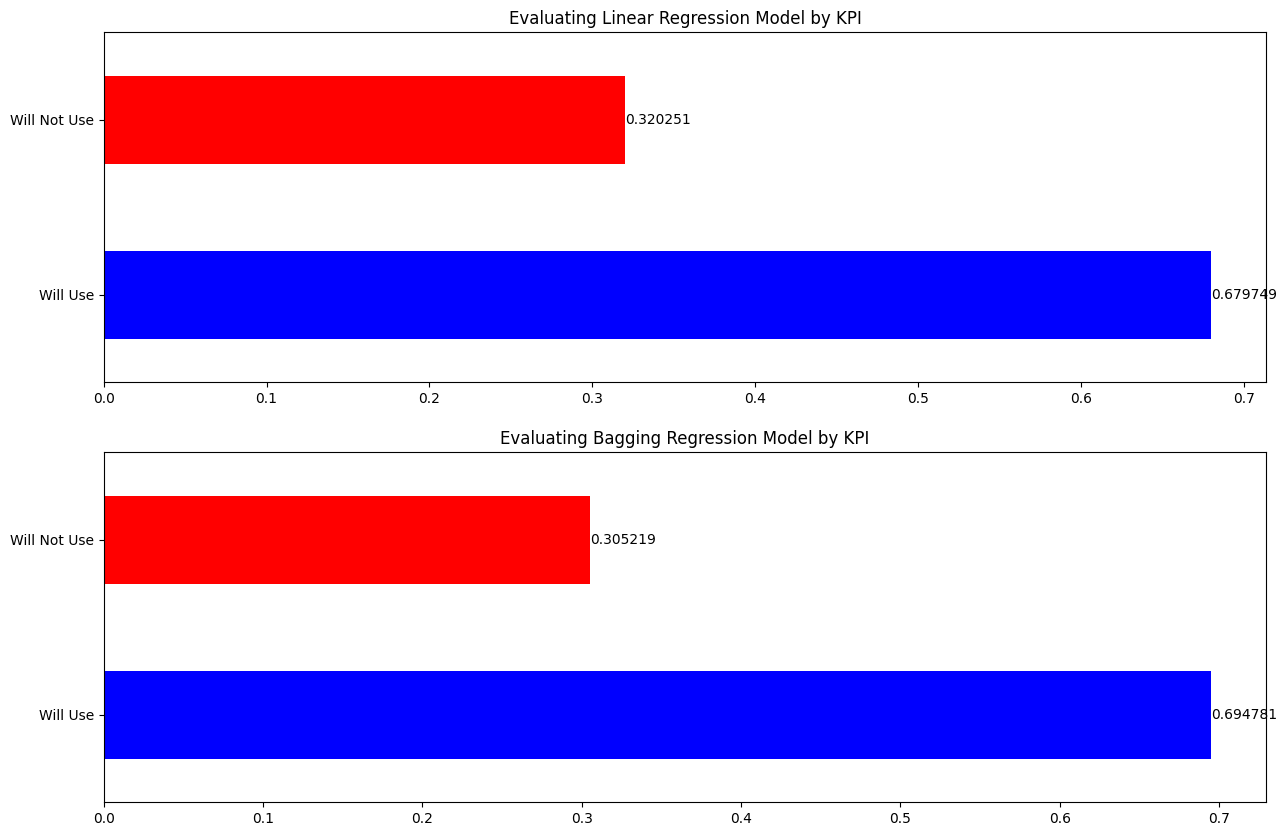

In [66]:
# Calculation of differences
price_df['lr_diff'] = price_df['lr'] - price_df['price']
price_df['br_diff'] = price_df['br'] - price_df['price']
price_df['lr_result'] = price_df['lr_diff'] > 25
price_df['br_result'] = price_df['br_diff'] > 25
price_df['lr_category'] = price_df['lr_result'].apply(lambda x: 
                                                      'Will Not Use' if x == True else 'Will Use')
price_df['br_category'] = price_df['br_result'].apply(lambda x: 
                                                      'Will Not Use' if x == True else 'Will Use')

fig, ax = plt.subplots(2,1, figsize=(15, 10))
price_df['lr_category'].value_counts(normalize=True).plot.barh(ax=ax[0], color=['blue', 'red'])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Evaluating Linear Regression Model by KPI')
price_df['br_category'].value_counts(normalize=True).plot.barh(ax=ax[1], color=['blue', 'red'])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Evaluating Bagging Regression Model by KPI')
plt.show()

As we can see by the KPI presented above, the results are very promising. With the Linear Regression model, 67.97% of predictions were not 25 dollars higher than the actual price. With the Bagging Regression model, 69.27% of predictions were not 25 dollars higher than actual price.

Although the results obtained are still far from desirable 90% or even higher, it may represent a big improvement to the platform, in order to drastically increase the number of people signing up and using it. As informed, at the moment, only 2% of people who visit the site end up using it. By developing this price prediction model, we may attract the attention of 69% of visitors, encouraging them to use our system.

## 6. Recommendations

To help improve Inn the Neighborhood platform, attract more people to sign up and use it, we recommend the development of a professional and appealing design, made by the front-end team of the company, to show our Bagging Regression Model predictions. With this new feature, about 69% of predictions will encourage the visitors to explore more and use our system. For sure this will represent a drastical increase of users, compared to previous 2% of visitors.

To further improve our model, we may perform stratified tests, in order to perform better modelling to specific public as different property types, since we have so many different types and they can perform differently.

To improve our model, we can make the following directions:

- Since decision tree models are very sensitive to the training set, we recommend frequent monitoring and regular updates to the Bagging Model, in order to avoid biasing or overfitting of the model;
- It would be interesting to test other hyperparameters, over different ensemble models also, like random forest and gradient boosted tree models;
- We may work more on future engineering and try other transformations, including PCA (Principal Component Analysis) for better feature representation;
- We may also suggest testing neural networks for performance comparison. We may loose interpretability, but if only the correct price prediction is the main factor, it may perform better.